# WeChat group "WWG West Resident 林茵西住户"

## 1-IMPORT DATA & CREATE A CLEAN FILE

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data = pd.read_table('residents1.txt',delimiter="                     ",error_bad_lines=False, encoding = 'ANSI')
pd.set_option("max_colwidth", 1000)
data.sample(5)

C:\Users\titre\AppData\Roaming\Python\Python38\site-packages\pandas\io\parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())
Skipping line 10978: Expected 1 fields in line 10978, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 11034: Expected 1 fields in line 11034, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 11126: Expected 1 fields in line 11126, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 11172: Expected 1 fields in line 11172, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 11312: Expected 1 fields in li

,"The chatting history for this WeChat group ""WWG West Resident 林茵西住户"" is shown below."
1447,Cath Thai 10:05
9616,Jing 23:48
7861,Hasan Turkmen 19:56
4055,直接拿过去吧
9163,陈洁 08:20


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 1 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   The chatting history for this WeChat group "WWG West Resident 林茵西住户" is shown below.  9893 non-null   object
dtypes: object(1)
memory usage: 77.4+ KB


In [4]:
data['Chats'] = data['The chatting history for this WeChat group "WWG West Resident 林茵西住户" is shown below.'].apply(str)

In [5]:
#step1 IDENTIFY DATE and INPUT AS COLUMN
data['Date'] = data['Chats'].str.contains('—————  2022')
data.head(3)

,"The chatting history for this WeChat group ""WWG West Resident 林茵西住户"" is shown below.",Chats,Date
0,————— 2022-03-15 —————,————— 2022-03-15 —————,True
1,Kiran Chandra 07:40,Kiran Chandra 07:40,False
2,Good morning does anyone know a center for testing that doesn’t have these long lines?,Good morning does anyone know a center for testing that doesn’t have these long lines?,False


In [6]:
data['Date'] = data[data['Chats'].str.contains('—————  2022')]
data.head(3)

,"The chatting history for this WeChat group ""WWG West Resident 林茵西住户"" is shown below.",Chats,Date
0,————— 2022-03-15 —————,————— 2022-03-15 —————,————— 2022-03-15 —————
1,Kiran Chandra 07:40,Kiran Chandra 07:40,NaN
2,Good morning does anyone know a center for testing that doesn’t have these long lines?,Good morning does anyone know a center for testing that doesn’t have these long lines?,NaN


In [7]:
#can confirm that we have all date?
data['Date'].unique()

array(['—————  2022-03-15  —————', nan, '—————  2022-03-16  —————',
       '—————  2022-03-17  —————', '—————  2022-03-18  —————',
       '—————  2022-03-19  —————', '—————  2022-03-20  —————',
       '—————  2022-03-21  —————', '—————  2022-03-22  —————',
       '—————  2022-03-23  —————', '—————  2022-03-24  —————',
       '—————  2022-03-25  —————', '—————  2022-03-26  —————',
       '—————  2022-03-27  —————', '—————  2022-03-28  —————'],
      dtype=object)

In [8]:
#clean date format, get rid of 6 first and 6 last characters
data['Date'] = data['Date'].str.slice(start=7, stop=-7)
data['Date'].unique()

array(['2022-03-15', nan, '2022-03-16', '2022-03-17', '2022-03-18',
       '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
       '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26',
       '2022-03-27', '2022-03-28'], dtype=object)

In [9]:
#forward fill all dates 
data['Date']= data['Date'].ffill()
data.head(3)

,"The chatting history for this WeChat group ""WWG West Resident 林茵西住户"" is shown below.",Chats,Date
0,————— 2022-03-15 —————,————— 2022-03-15 —————,2022-03-15
1,Kiran Chandra 07:40,Kiran Chandra 07:40,2022-03-15
2,Good morning does anyone know a center for testing that doesn’t have these long lines?,Good morning does anyone know a center for testing that doesn’t have these long lines?,2022-03-15


In [10]:
#change format from object to date
data['Date']= pd.to_datetime(data['Date'])
data['Date'].dtypes

dtype('<M8[ns]')

In [11]:
#finally deleting the 6 rows that had only the date to clean database
data["Chats"].str.contains('—————  2022')

0        True
1       False
2       False
3       False
4       False
        ...  
9888    False
9889    False
9890    False
9891    False
9892    False
Name: Chats, Length: 9893, dtype: bool

In [12]:
data = data[data["Chats"].str.contains('—————  2022') == False]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9879 entries, 1 to 9892
Data columns (total 3 columns):
 #   Column                                                                                Non-Null Count  Dtype         
---  ------                                                                                --------------  -----         
 0   The chatting history for this WeChat group "WWG West Resident 林茵西住户" is shown below.  9879 non-null   object        
 1   Chats                                                                                 9879 non-null   object        
 2   Date                                                                                  9879 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 308.7+ KB


In [13]:
data = data[['Chats','Date']]
data.head(3)

,Chats,Date
1,Kiran Chandra 07:40,2022-03-15
2,Good morning does anyone know a center for testing that doesn’t have these long lines?,2022-03-15
3,幸子(Grace) 07:52,2022-03-15


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9879 entries, 1 to 9892
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Chats   9879 non-null   object        
 1   Date    9879 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 231.5+ KB


## 2-PREPROCESS DATA TO GET A TABLE WITH DATE TIME NAME CHAT

### 2.1 SPLIT EVERY 2 ROWS between NAME and TIME

In [15]:
#extracting time to new column
time = []

for i in data.Chats:
    if i[-3:-2] == ':':
        res = i[-5:]
    else : 
        res = ""
    time.append(res)   
    
len(time)

9879

In [16]:
data["Time"] = time
data.sample(10)

,Chats,Date,Time
2084,3. Silvia_W105 +1,2022-03-20,
6113,Betty 19:42,2022-03-23,19:42
9271,雯彬������ 10:10,2022-03-27,10:10
6555,6. Betty #45,2022-03-24,
9008,jun 11:55,2022-03-26,11:55
1197,3/16 報告出来了,2022-03-18,
4655,Perfect- how much per basket?,2022-03-21,
2900,20. W62 Maggie Ying 1 蓝,2022-03-20,
6553,4. Jack 15,2022-03-24,
2971,6. Ally wang，W108-101 +1,2022-03-20,


In [17]:
#STEP 3 : if time is not null, extract anything before time to get name

In [18]:
name = []

for i in data.Chats:
    if i[-3:-2] == ':':
        res = i[:-5]
    else : 
        res = ""
    resu = res 
    name.append(res)   
    
len(name)

9879

In [19]:
data['Name'] = name
data.sample(20)

,Chats,Date,Time,Name
3643,Jenny 12:40,2022-03-20,12:40,Jenny
2395,8. Jing w115 1篮,2022-03-20,,
7738,我看别的区是小区为单位，我朋友的隔壁小区还封着，他们自己解封了,2022-03-24,,
6484,5. Renny 21,2022-03-24,,
4435,@@Jenny 好的，谢谢[Rose],2022-03-21,,
2004,幸子(Grace) 10:36,2022-03-20,10:36,幸子(Grace)
3946,石磊 Martin 18:55,2022-03-20,18:55,石磊 Martin
8143,24. ��sharon�� 113-301,2022-03-25,,
2336,17. Sergio Feliciangeli-W107-102,2022-03-20,,
2151,4. Amy w#117 2篮,2022-03-20,,


In [20]:
#STEP 4 move the name and time down 1 row and fill forward

In [21]:
data['time'] = data['Time'].shift(1)
data['name'] = data['Name'].shift(1)
data.sample(20)

,Chats,Date,Time,Name,time,name
9472,Sharry 20:30,2022-03-27,20:30,Sharry,,
3585,5. Simei 140 1 篮,2022-03-20,,,,
8541,⚠以小区为单位，��¥1500起配送（未达到¥1500无法配送哟）⚠，群接龙方式参加活动，到小区门后放至外卖防疫点，外卖达到后第一时间本群通知各位。,2022-03-25,,,,
3941,这位135的大叔是帮着亲戚看装修的，没想到stuck在这里。今天晚饭已经搞定。明天大家可以看看能不能帮衬一下。,2022-03-20,,,18:51,Faye 徐菲
2617,29. Faye 137 2篮,2022-03-20,,,,
2464,5. Simei 140 1 篮,2022-03-20,,,,
4128,Julia C. 19:59,2022-03-20,19:59,Julia C.,,
9388,瘦不下来的LU 13:41,2022-03-27,13:41,瘦不下来的LU,,
4638,Jenny 13:36,2022-03-21,13:36,Jenny,,
1084,谢谢,2022-03-17,,,14:41,Simei


In [22]:
data.fillna(method='ffill')
data.sample(20)

,Chats,Date,Time,Name,time,name
8842,是,2022-03-25,,,21:47,Wai
7984,[Images: 627508a664fc1c815610dd1ab1c92134.jpg(View in attachment)],2022-03-24,,,21:25,monica albertini
7099,32. Anny #72,2022-03-24,,,,
8655,"@Danielle Sheppard 106W are you sure the price is right?[Chuckle], 1 for 160, 6 for 1200(200 per bottle).",2022-03-25,,,19:15,James
2936,16. Sergio Feliciangeli-W107-102,2022-03-20,,,,
1502,S R Arora ~ # 47 13:01,2022-03-19,13:01,S R Arora ~ # 47,,
4492,幸子(Grace) 12:42,2022-03-21,12:42,幸子(Grace),,
5966,我们的在哪呢，都没人发[Emm],2022-03-23,,,16:29,Jing��
8480,幸子(Grace) 15:05,2022-03-25,15:05,幸子(Grace),,
4880,请问这古北送过来的吗？,2022-03-22,,,10:29,刘晰


In [23]:
#drop the line to keep only chat, name, time, date
data['name'].replace('', np.nan, inplace=True)
data.dropna(subset=['name'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3709 entries, 2 to 9892
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Chats   3709 non-null   object        
 1   Date    3709 non-null   datetime64[ns]
 2   Time    3709 non-null   object        
 3   Name    3709 non-null   object        
 4   time    3709 non-null   object        
 5   name    3709 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 202.8+ KB


In [24]:
data = data[['Date','time','name','Chats']]
data.sample(20)

,Date,time,name,Chats
8731,2022-03-25,20:04,James,是的，主要是长者，没打针和长期病患
7578,2022-03-24,16:00,一人二小,同问
3907,2022-03-20,17:24,刘倩Lucia,哈哈 小肉栗特别好吃 下次可以一起拼了 ～
5320,2022-03-22,21:35,陈浩 Chen Hao,[Images: 0be64510c6db6aefc749c2d77fc43186.jpg(View in attachment)]
5699,2022-03-23,13:22,幸子(Grace),大家在等核酸吧
3340,2022-03-20,11:55,瘦不下来的LU,I think so
8923,2022-03-26,10:58,丹丹,我需要明天晚上的，怎么订？
9781,2022-03-28,14:25,Simei,我自己是烘焙盲
4810,2022-03-22,09:04,Rachel,[Images: 3ef4dff7f515a9409ad416557c7f1fab.jpg(View in attachment)]
7844,2022-03-24,19:47,陈浩 Chen Hao,以虹桥镇为例，这个就是一个申请报告。不会以小区为单位申请，这样领导忙不过来


### WE NOW HAVE A CLEAN DATABASE TO START WORKING WITH

In [25]:
#the index of the data DF is messed up we need to reset 
data = data.reset_index(drop=True)
data.head()

,Date,time,name,Chats
0,2022-03-15,07:40,Kiran Chandra,Good morning does anyone know a center for testing that doesn’t have these long lines?
1,2022-03-15,07:52,幸子(Grace),Same question here [Drool][Drool][Drool]
2,2022-03-15,08:11,Wai,Wai 08:12
3,2022-03-15,08:12,Wai,This clinic used to offer quick test. But not sure if they still do. Cost is about rmb280
4,2022-03-15,08:13,Wai,"Shanghai United also offer NAT for RMB280. Hence, no line at all. I suppose all the private western hospitals offer similar express services but just at higher costs"


### 2.2 PROCESS DATA WITH LANGUAGE DETECTION

In [26]:
data.Chats[1]

'Same question here [Drool][Drool][Drool]'

In [27]:
text = data.Chats[1]

In [28]:
#function to iterate through rws and detect lang

import fasttext

PRETRAINED_MODEL_PATH = 'lid.176.bin'
model = fasttext.load_model(PRETRAINED_MODEL_PATH)

lang = []
for i in data.Chats:
    predictions = model.predict(i)
    pred = predictions[0][0][-2:]
    lang.append(pred)   


In [29]:
# #name country lang
# from pycountry import languages

# lang_name = languages.get(alpha_2='en').name
# print(lang_name)

In [30]:
data['lang'] = lang
data.sample(10)

,Date,time,name,Chats,lang
2357,2022-03-23,16:55,瘦不下来的LU,@Jenny 我准备叫外卖了,zh
205,2022-03-16,09:26,陈浩 Chen Hao,@宋叶萍 今早的发布会，昨天没有我们小区及附近的小区有确诊或无症状啊？,zh
722,2022-03-19,12:07,Jing��,那我们是不是要等到整个华漕48小时2次核酸结果全阴性才解封,zh
2847,2022-03-24,21:30,Jenny,@丹丹_W58 叮咚感觉安全点,ja
2748,2022-03-24,19:29,陈洁,为什么我们的检测速度这么慢，别的小区封48小时，基本晚6-12个小时就解封了，不是说检测出结果6个小时，特殊情况12个小时？,zh
2740,2022-03-24,19:23,Susan Lu,突然发现中文的博大精深，我彻底读不懂了[Facepalm][Facepalm][Facepalm] 区和镇的分别在哪？,zh
1450,2022-03-21,07:50,老韓,[Images: 438b49bebd74cea7856ee6bf988fd384.jpg(View in attachment)],en
2161,2022-03-23,11:19,Vindy�� �� ��,@宋叶萍 宋书记，我爸年纪大了，有很多病，药已吃完，需要去医院配药，现在封锁着怎么办啊？我是东区的不知道该问谁？在这里问一下你，谢谢。,zh
1538,2022-03-21,10:43,Danielle Sheppard,[Contact Card: Breakfast Champion],en
3563,2022-03-27,23:44,丹丹,[Images: d4cad0b0194ccd73cedd15be27e6c2ef.jpg(View in attachment)],en


In [34]:
#clean wrong languages
for row in data.lang:
    if row != 'en':
        if row != 'zh':
            row = data.lang.replace(row,'zh', inplace = True)
data.sample(20)

,Date,time,name,Chats,lang
2234,2022-03-23,14:27,丹丹,这么突然,zh
1851,2022-03-22,16:50,Heena D,is open now,en
2755,2022-03-24,19:39,Faye 徐菲,这也是扯,zh
375,2022-03-16,13:39,Jing��,谢谢，都加了,zh
2121,2022-03-23,08:58,Betty,Me2 please [Rose],en
3401,2022-03-27,10:24,Sophia Su,收到，谢谢～,zh
1551,2022-03-21,11:54,Jenny,已经在路上了,zh
2285,2022-03-23,16:02,Jenny,居委书记能不能解释一下,zh
1783,2022-03-22,10:30,Kona,@丹丹_W58 這个超級棒！謝謝！,zh
1837,2022-03-22,13:10,李敏,好的,zh


In [35]:
#NOW GET SOME DATA OVER LANGUAGE AND TYPE SHARED

comment = data.loc[data['lang'] == 'zh']
comment

,Date,time,name,Chats,lang
5,2022-03-15,08:15,Lea��冯,15370756151,zh
11,2022-03-15,08:38,幸子(Grace),@Wai_W105-101 @Lea W155 [Rose][Rose]thanks,zh
19,2022-03-15,11:44,Angelina����,when?,zh
32,2022-03-15,11:49,Xing Zhao,小区封了吗[Facepalm],zh
36,2022-03-15,11:51,Angelina����,@Danielle Sheppard 106W [CoolGuy][Hug],zh
...,...,...,...,...,...
3689,2022-03-28,20:10,Jenny,我们配吗？[Lol],zh
3690,2022-03-28,20:11,丹丹,多乐之日的单子，种类很多，感兴趣的入群吧,zh
3694,2022-03-28,20:13,Sharry,是的 免费,zh
3698,2022-03-28,20:14,平安是福,通知：政府为封控期间涉外小区生活物资购买渠道多样化，特别开通相关自助买菜链接，有需要的业主和住客可以看一下。,zh


### 2.3 TRANSLATE ALL TO ENGLISH with GOOGLE TRANS

In [97]:
from googletrans import Translator

lang2 = []
tl = Translator()

for i in data.Chats:
    p = tl.translate(i)
    pr = p.text
    lang2.append(p)   

lang2[1]

ConnectTimeout: _ssl.c:1114: The handshake operation timed out

In [94]:
from googletrans import Translator
text = data['Chats'][3698]
tl = Translator()
dt1 = tl.detect(text)
print(dt1)

Detected(lang=zh-CN, confidence=None)


In [95]:
dt1.lang

'zh-CN'

In [96]:
dt2 = tl.translate(text)
print(dt2.src)
print(dt2.dest)
print(dt2.origin)
print(dt2.text)

zh-CN
en
通知：政府为封控期间涉外小区生活物资购买渠道多样化，特别开通相关自助买菜链接，有需要的业主和住客可以看一下。
Notice: The government is diversified by the living materials for foreign-bearing communities during the prevention period, and specially opened the relevant self-service buying chain links, and the owners and guests need to see it.


In [98]:
from deep_translator import GoogleTranslator

In [ ]:
tr = GoogleTranslator(target='en')

#languages_list = []
#lang_map = tr.get_supported_languages(as_dict=True) # Get in form of dict

# for i in lang_map.items():
#     languages_list.append(key.title()) # Making first letter capital with title()


### 2.3bis TRANSLATE ALL IN ENGLISH with PY TRANSLATE

In [75]:
#testing for 1 msg
from translate import Translator
tl= Translator(to_lang="en",from_lang='zh') 

done = tl.translate(data['Chats'][32])
done

'Is anyone there? [Facepalm]'

In [85]:
#iterating through data
# data['msg'] = data['Chats'].apply(lambda x : tl.translate(x) if data['lang']=='zh' else x)
en_msg = []
for x in data['Chats']:
    if i == 'zh' in data['lang']:
        done = tl.translate(x)
        en_msg.append(done)
    else:
        en_msg.append(x)
en_msg

['Good morning does anyone know a center for testing that doesn’t have these long lines?',
 'Same question here [Drool][Drool][Drool]',
 'Wai  08:12',
 'This clinic used to offer quick test. But not sure if they still do. Cost is about rmb280',
 'Shanghai United also offer NAT for RMB280. Hence, no line at all. I suppose all the private western hospitals offer similar express services but just at higher costs',
 '15370756151',
 'Lea��冯  08:18',
 '[Images: 77c69ae7a8d53fd48169f13927c4ecd6.jpg(View in attachment)]',
 'Good morning parents. Thinking of you as we start this journey. A gentle reminder for us and our kiddos: try not to stress if tech fails us and things don\'t go as planned. We don\'t have to accomplish anything beyond checking in and making sure everyone knows what to do. It is only day 1 (or 2 for some) and we have time to work out the kinks. Several kids will get stressed out if they can\'t figure things out right away.... and us too. Be gentle with them and with yourselv

In [80]:
#testing why not all was translated
tes = tl.translate('@宋叶萍\u2005有确诊怎么会是48小时呢？')
tes

RuntimeError: generator raised StopIteration

In [82]:
#py translate has a limit on translations TRANSLATION_API_MAX_LENGHT

### 2.4 CREATE CATEGORY MESSAGE TYPE ie IMAGES, REPLY..

In [36]:
#create a function for categorizing between image, reply, questions...
def typo(x):
    if x.startswith('[Images: '):
        return 'image'
    elif x.startswith('@'):
        return 'reply'
    elif "?" in x:
        return 'question'
    else:
        return ''


In [37]:
data['typo'] = data['Chats'].apply(lambda x : typo(x))
data.sample(20)

,Date,time,name,Chats,lang,typo
361,2022-03-16,13:26,宋叶萍,[Images: feaade751eac19799afe4332b56c11df.jpg(View in attachment)],en,image
1703,2022-03-21,15:34,Huating,有問題的麻煩進群問客服喔 ��,zh,
2682,2022-03-24,19:04,James,不是以小区为单位吗？,zh,
26,2022-03-15,11:46,Angelina����,were you yold.this on return to.compound @Jing w115,en,
643,2022-03-18,14:09,Casy,我前天订的菜和水果昨天送到了很新鲜,zh,
1138,2022-03-20,12:32,Jenny,草莓园的老板说数量多，今天来不及采摘送过来，明天上午10点左右送到，等晚点确认好不加单了我们就付款,zh,
2959,2022-03-25,11:02,jun,[Images: 232a552bb61ad74e861f387b6ebb6a91.jpg(View in attachment)],en,image
1940,2022-03-22,19:18,Jing,学习中,zh,
177,2022-03-15,22:18,石磊 Martin,转自业主群：,zh,
2453,2022-03-24,09:21,丹丹,@宋叶萍 领导，我们小区的核酸安排上呗？关的这么早，不要解封再是最后一个吧,zh,reply


### 2.5 CATEGORY MESSAGE STANCE - VOCAB used

In [38]:
#from the google trans = get main theme of the msg when not already in typo column

## 3-LETS VISUALIZE SOME DATA : 

### MOST POSTERS - PEOPLE SHARING

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [40]:
data.describe()

C:\Users\titre\AppData\Local\Temp/ipykernel_11348/3175101911.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,Date,time,name,Chats,lang,typo
count,3709,3709,3709,3709,3709,3709
unique,14,882,150,3390,2,4
top,2022-03-20 00:00:00,09:12,Jenny,#接龙,zh,
freq,526,18,327,52,2476,2854
first,2022-03-15 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2022-03-28 00:00:00,NaN,NaN,NaN,NaN,NaN


In [41]:
data.describe().name.top

C:\Users\titre\AppData\Local\Temp/ipykernel_11348/3074080641.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe().name.top


'Jenny  '

In [42]:
print('Number of days studied : ', data.Date.nunique())
print('Total nb of msg sent : ', data.Chats.count())
print('Number of unique participants speaking : ', data.name.nunique())
print('Top speaker among residents : ', data.describe().name.top, ' with a total of ', data.describe().name.freq, ' messages')
print('Most language used: ', data.describe().lang.top)

C:\Users\titre\AppData\Local\Temp/ipykernel_11348/3978776079.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Top speaker among residents : ', data.describe().name.top, ' with a total of ', data.describe().name.freq, ' messages')


Number of days studied :  14
Total nb of msg sent :  3709
Number of unique participants speaking :  150
Top speaker among residents :  Jenny    with a total of  327  messages
Most language used:  zh


C:\Users\titre\AppData\Local\Temp/ipykernel_11348/3978776079.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Top speaker among residents : ', data.describe().name.top, ' with a total of ', data.describe().name.freq, ' messages')
C:\Users\titre\AppData\Local\Temp/ipykernel_11348/3978776079.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Most language used: ', data.describe().lang.top)


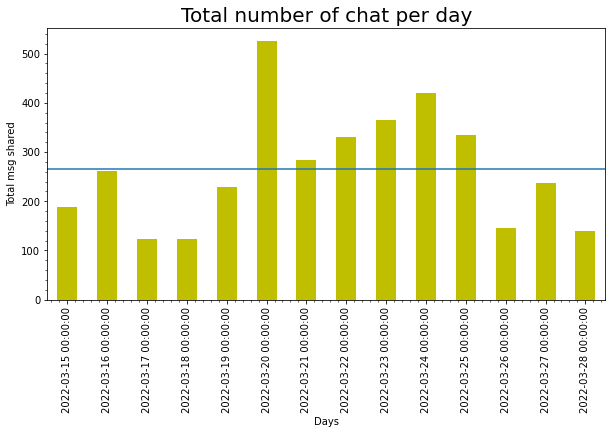

In [43]:
#plot total number of chat per day
days = data.groupby('Date')['Chats'].count()
fig,ax= plt.subplots()
days.plot(kind = 'bar',ax=ax, color='y',figsize=(10,5))

plt.minorticks_on()
ax.tick_params(axis='x',which='minor',bottom='off')
ax.set_xlabel("Days")
ax.set_ylabel("Total msg shared")
ax.set_title(("Total number of chat per day"), fontsize=20)

# use axhline
mean = days.mean()
ax.axhline(mean)

In [44]:
days.describe()
print('we averaged shared ',days.describe().mean(),' chats per day with a min of ', days.describe().min(),' and a max on sunday of ',days.describe().max(),' chats') 

we averaged shared  223.5856132296604  chats per day with a min of  14.0  and a max on sunday of  526.0  chats


In [45]:
#plot number of chats per name over period
mostvocal = data['name'].value_counts().sort_values(ascending = False)
mostvocal.nlargest(10)

Jenny            327
幸子(Grace)        235
Jack             196
丹丹               163
Betty            133
雯彬������         131
Xing Zhao        124
Susan Lu         123
Rachel           119
陈浩 Chen Hao      111
Name: name, dtype: int64

In [46]:
#most vocal per day 
mostvocalday = data.groupby('Date')['name'].apply(lambda x: x.value_counts().head(1))
mostvocalday

Date                     
2022-03-15  Jenny            17
2022-03-16  Xing Zhao        28
2022-03-17  宋叶萍              15
2022-03-18  雯彬������         12
2022-03-19  陈浩 Chen Hao      20
2022-03-20  Jenny            70
2022-03-21  Jenny            48
2022-03-22  Jack             38
2022-03-23  Jenny            57
2022-03-24  Jenny            49
2022-03-25  雯彬������         33
2022-03-26  Susan Lu         16
2022-03-27  雯彬������         22
2022-03-28  Simei            14
Name: name, dtype: int64

## GOV ANALYSIS

In [47]:
#GOV BEEN AT MENTIONNED
gov = data[data['Chats'].str.contains('@宋叶萍') == True]
gov

,Date,time,name,Chats,lang,typo
158,2022-03-15,21:07,陈浩 Chen Hao,@宋叶萍 请问是因为小区有密接吗？,zh,reply
166,2022-03-15,21:13,顾蔚 Wei Gu,@宋叶萍 谢谢宋主任，清晰透明的介绍。请问确诊者是在小区还是隔离发现？确诊邻居何时离开了小区？是否全家已经离开？我们小区其他居民万一也有异常，是否也要全家马上被带走？需要提前准备箱子吗？抱歉问题有点多，看您时间酌情回答哈。,zh,reply
172,2022-03-15,21:52,雯彬������,@宋叶萍 有确诊怎么会是48小时呢？,zh,reply
173,2022-03-15,21:54,Betty,你好，請問一下是確診人士和其家人是於那一天被送離小區的？方便透露一下嗎？@宋叶萍,zh,
175,2022-03-15,22:04,雯彬������,@宋叶萍 确诊的是阿姨吗？,zh,reply
...,...,...,...,...,...,...
2753,2022-03-24,19:38,Jenny,@宋叶萍 请问我们这块包含吗？,zh,reply
2916,2022-03-25,09:38,Agnes,@宋叶萍 还是不理解为什么我们还是在一个封的状态。是否我们的小区还有阳性？如果没有阳性我们按道理应该解封。谢谢解释。,zh,reply
3042,2022-03-25,17:51,Susan Lu,我们都是阴性是不是小区应该解封了@宋叶萍,zh,
3098,2022-03-25,19:51,Rachel,我想确定一下，我们是否要再封14天@宋叶萍,zh,


### TOTAL CHATS

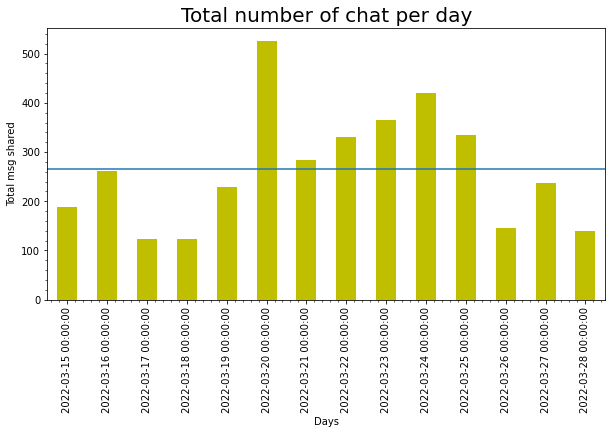

In [48]:
#plot total number of chat per day
days = data.groupby('Date')['Chats'].count()
fig,ax= plt.subplots()
days.plot(kind = 'bar',ax=ax, color='y',figsize=(10,5))

plt.minorticks_on()
ax.tick_params(axis='x',which='minor',bottom='off')
ax.set_xlabel("Days")
ax.set_ylabel("Total msg shared")
ax.set_title(("Total number of chat per day"), fontsize=20)

# use axhline
mean = days.mean()
ax.axhline(mean)

In [49]:
#total chats shared over the period
total_msg = data['Chats'].count()
total_msg

3709

### HOW MANY DAYS

In [50]:
#total day of data
total_days = data['Date'].nunique()
total_days

14

### SPLIT OF LANGUAGE USED OVER THE PERIOD

<AxesSubplot:xlabel='Date'>

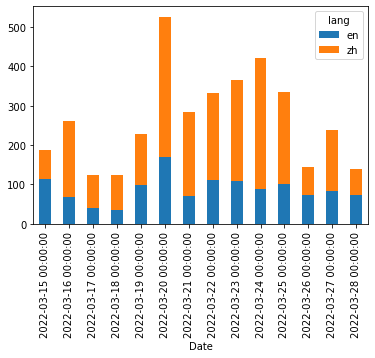

In [51]:
#some stats over language per day 
data.groupby(['Date', 'lang']).size().unstack().plot(kind='bar', stacked=True)

### TYPE OF MESSAGES SENT

<AxesSubplot:xlabel='Date'>

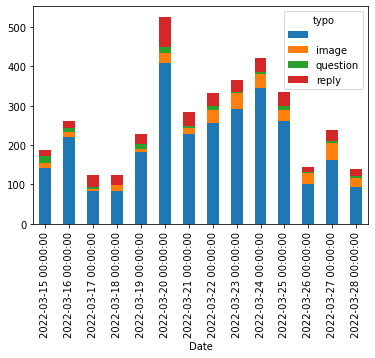

In [52]:
#some stats over typo used
data.groupby(['Date', 'typo']).size().unstack().plot(kind='bar', stacked=True)

### GOV BEING AT MENTIONNED - lady called secretary Song : 宋叶萍 added to the chat for gov announcements

In [53]:
#HOW MANY TIMES GOV BEEN AT MENTIONNED
gov_at_mentionned = data['Chats'].str.contains('@宋叶萍').sum()
print('The governement liaison lady was called out on question ', gov_at_mentionned,' times')

The governement liaison lady was called out on question  85  times


### HOW MANY TIMES GOV LADY SPOKE

In [54]:
#How many times did gov speak
gov_msg = data['name'].str.contains('宋叶萍').sum()
print('The governement liaison lady spoke only ', gov_msg,' times')

The governement liaison lady spoke only  64  times


### WHEN WAS THE LAST TIME SHE SPOKE

In [55]:
gov_msg = data[data['name'].str.contains('宋叶萍')]
gov_msg.tail()

,Date,time,name,Chats,lang,typo
2688,2022-03-24,19:05,宋叶萍,全镇都没出来,zh,
2691,2022-03-24,19:05,宋叶萍,要解封肯定是一起的,zh,
2692,2022-03-24,19:05,宋叶萍,同时间各小区解封,zh,
2696,2022-03-24,19:06,宋叶萍,以小区为单位,zh,
2722,2022-03-24,19:11,宋叶萍,核酸报告出来以后该接的接该封的封,zh,


### OCCURRENCE OF HER MESSAGES 

In [56]:
#Grace how many msg yesterday
chris = data[data['Date'] == '2022-03-23']
chris2 = chris['name'].str.contains('Grace').sum()
chris2

47

In [57]:
chris = chris[(chris["name"].str.contains('Grace') == True) | (chris["Chats"].str.contains('duck') == True)]
chris

,Date,time,name,Chats,lang,typo
2067,2022-03-23,00:10,幸子(Grace),等0点做啥？,zh,
2074,2022-03-23,08:00,幸子(Grace),Jack 08:02,en,
2077,2022-03-23,08:07,幸子(Grace),感觉小区解封有望[Tongue],zh,
2087,2022-03-23,08:19,幸子(Grace),其实不太看得懂 但是大概明白政策有很大变化。一般政策变化都需要大量论证，专家介入，然后流程确认，这么快变了这么多，感觉他们都没有睡觉吧[Facepalm],zh,
2090,2022-03-23,08:24,幸子(Grace),我觉得张医生说的很清楚,zh,
2092,2022-03-23,08:25,幸子(Grace),[Images: 08bb6479f0b63c5485af43f0fec6812f.jpg(View in attachment)],en,image
2093,2022-03-23,08:25,幸子(Grace),[Images: 955785e9820299f60775ccffc8909346.jpg(View in attachment)],en,image
2094,2022-03-23,08:25,幸子(Grace),[Images: 9d89a9297d8a00ae4a51d1a1f750338c.jpg(View in attachment)],en,image
2095,2022-03-23,08:25,幸子(Grace),[Images: 7f442c1d5efaa083b226c8bedec12eb5.jpg(View in attachment)],en,image
2096,2022-03-23,08:27,幸子(Grace),凡是持久的，必是温和可持续的,zh,
